입력은 어떻게 정의해야 하는지, batch나 epoch이나 이런 건 어떻게 하는지, 선처리(이미지 처리)를 하고 싶은데 어떻게 하는지, MNIST, CIFAR-10 등이 아닌 내 데이터를 넣고 싶은데 어떻게 하는지에 대해서도 알아보겠습니다.

# DataLoader

DataLoader(=Input value setting)에 대해서 살펴보겠습니다. 

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.autograd import Variable
from torch.utils.data import DataLoader
import numpy as np

import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

### transforms & Compose

transforms는 선처리를 위해서 가져온 함수입니다. Compose는 선처리를 많이 해야하는 데이터들이 많을 때 그 데이터들을 한칸에([ _ , _ , ... , ]) 모아주는 함수입니다. 실행순서는 순서대로 진행됩니다.

docs에 나온 **transforms.Compose([transforms.CenterCrop(10), transforms.ToTensor(), ... ])** 에 대해서도 살펴보겠습니다.
* CenterCrop은 Center에서 croping(잘라내기)를 하는 것입니다. (예제에서는 10만큼만 croping하는 것으로 나와있습니다.) 다음으로 croping한 것을 Tensor로 바꾸는 코드입니다.
* transforms.ToTensor()는 가져온 이미지를 Tensor형태로 바꾸는 함수입니다. 

추가적으로 
**numpy.ndarray (H x W x C) in the range [0, 255] -> torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]** 으로 변경을 하면 채널의 위치도 변경됩니다.

**transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))** 도 살펴보자면, docs에서는 **torchvision.transforms.Normalize(mean, std)** 이런 코드로 나와있습니다.
* input[channel] = (input[channel] - mean[channel]) / std[channel] 이러한 연산을 수행한다.
* mean (sequence) – Sequence of means for each channel.
* std (sequence) – Sequence of standard deviations for each channel.


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./cifar10_data',
                                                            train=True,
                                                            download=True,
                                                            transform=transform)
 
testset = torchvision.datasets.CIFAR10(root='./cifar10_data',
                                                            train=False,
                                                            download=True,
                                                            transform=transform)

Files already downloaded and verified
Files already downloaded and verified


### torchvision.datasets

* MNIST
* Fashion-MNIST
* EMNIST
* COCO
* LSUN
* ImageFolder
* DatasetFolder
* Imagenet-12
* CIFAR
* STL10
* SVHN
* PhotoTour 등 이러한 것들이 **torchvision.datasets** 에 담겨있습니다.


### torchvision.datasets.CIFAR10(root, train=True, transform=None, target_transform=None, download=False) 

* root (string) – Root directory of dataset where directory cifar-10-batches-py exists or will be saved to if download is set to True.
* train (bool, optional) – If True, creates dataset from training set, otherwise creates from test set. (중요!)
* transform (callable, optional) – A function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.RandomCrop
* target_transform (callable, optional) – A function/transform that takes in the target and transforms it.
* download (bool, optional) – If true, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.


In [4]:
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

* batch_size = 8, 뉴럴 네트워크에 input으로 줄 크기는 8(batch_size) x 3(channel) x 32 x 32
* num_workers = 2, batch_size가 커지면 당연히 이미지를 가져오는데 걸리는 시간이 오래걸립니다. 이미지를 가져오는 연산은 cpu가 처리를 하는데 cpu가 이미지를 가져올 때 cpu process를 몇 개를 가지고 쓰게 할 것인지를 정하는 것이다. 따라서 batch_size가 클수록 num_workers는 큰게 좋습니다.


In [5]:
# CIFAR10에 맞춰서 classes를 적어보겠습니다.
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
def imshow(img):
    img = img / 2 +0.5 # unnormalize
    np_img = img.numpy() # Tensor -> Numpy
    
    # 이전에 'numpy.ndarray (H x W x C) in the range [0, 255] -> torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]'
    # 으로 했었는데 다시 C x H x W -> H x W x C로 바꿔줍니다. 
    # C(0) x H(1) x W(2) -> H(1) x W(2) x C(0)으로 transpose!
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img, (1,2,0))).shape)

### images, labels 나누기

#### 방법 1) iter

In [7]:
# iter로 가둬놓고, dataiter.next()를 통해 images, labels로 나눌 수 있습니다. 
dataiter = iter(trainloader)
images, labels = dataiter.next()

#### 방법 2) enumerate (이 방법을 더 많이 쓴다고 합니다.)

In [8]:
# 8 x 3 x 32 x 32 x 6250(data 총 개수)을 for문으로 print한 것.
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)

```python
0 torch.Size([8, 3, 32, 32]) torch.Size([8])
1 torch.Size([8, 3, 32, 32]) torch.Size([8])
2 torch.Size([8, 3, 32, 32]) torch.Size([8])
3 torch.Size([8, 3, 32, 32]) torch.Size([8])
4 torch.Size([8, 3, 32, 32]) torch.Size([8])
5 torch.Size([8, 3, 32, 32]) torch.Size([8])
6 torch.Size([8, 3, 32, 32]) torch.Size([8])
7 torch.Size([8, 3, 32, 32]) torch.Size([8])
8 torch.Size([8, 3, 32, 32]) torch.Size([8])
.
.
.
6242 torch.Size([8, 3, 32, 32]) torch.Size([8])
6243 torch.Size([8, 3, 32, 32]) torch.Size([8])
6244 torch.Size([8, 3, 32, 32]) torch.Size([8])
6245 torch.Size([8, 3, 32, 32]) torch.Size([8])
6246 torch.Size([8, 3, 32, 32]) torch.Size([8])
6247 torch.Size([8, 3, 32, 32]) torch.Size([8])
6248 torch.Size([8, 3, 32, 32]) torch.Size([8])
6249 torch.Size([8, 3, 32, 32]) torch.Size([8])
```

#### 만약에 epoch을 넣고 싶다면 어떻게 해야할까요??
```python
for epoch in range(number of epoch):
    for n, (img, labels) in enumerate(trainloader):
        print(n, img.shape, labels.shape) 
        # 여기 부분에다가 학습되는 코드를 집어넣습니다. 
```

torch.Size([8, 3, 32, 32])
- - - - - - - - - -
(3, 70, 138)
(70, 138, 3)
- - - - - - - - - -
torch.Size([8, 3, 32, 32])
torch.Size([3, 32, 256])
torch.Size([3, 36, 274])
- - - - - - - - - -
plane   car   cat truck   cat   dog   dog plane


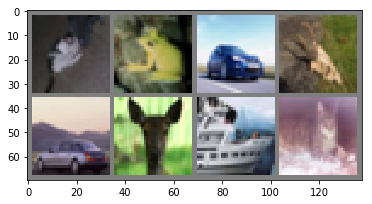

In [9]:
print(images.shape)

print("- - - - - - - - - -")

# print(np_img.shape)

# C(0) x H(1) x W(2) -> H(1) x W(2) x C(0)으로 transpose!
# print((np.transpose(np_img, (1,2,0))).shape)

# torchvision.utils.make_grid(tensor, nrow=8, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)
imshow(torchvision.utils.make_grid(images, nrow=4))

print("- - - - - - - - - -")

print(images.shape)

print((torchvision.utils.make_grid(images, padding=0)).shape)
print((torchvision.utils.make_grid(images, padding=2)).shape)

# torch.Size([3, 32, 256])
# torch.Size([3, 36, 274])

# torch.Size([3, 32 -> 36, 274])
# 하나의 이미지랑 패딩이 2씩이기 때문에 2x2를 추가하면 36이 됩니다.

# torch.Size([3, 36, 256 -> 274])
# batch가 8, nrow가 8, 양 끝에 2씩, 겹치는 부분 포함 총 9개 = 18이 추가됩니다. 

print("- - - - - - - - - -")

print(' '.join('%5s' %classes[labels[j]] for j in range(8)))

***

# 나의 Dataset을 넣는 방법

In [10]:
trans = transforms.Compose([transforms.Resize((100,100)), #100x100으로 resize
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [11]:
trainset = torchvision.datasets.ImageFolder(root='./images', transform=trans)
len(trainset)

7

In [12]:
trainloader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=1)

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

torch.Size([7, 3, 100, 100])
- - - - - - - - - -
(3, 206, 410)
(206, 410, 3)
- - - - - - - - - -
torch.Size([7, 3, 100, 100])
torch.Size([3, 104, 716])
- - - - - - - - - -
    0    0    1    1    2    2    2


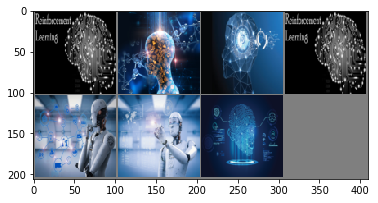

In [14]:
print(images.shape)

print("- - - - - - - - - -")

# print(np_img.shape)
# print((np.transpose(np_img, (1,2,0))).shape)
imshow(torchvision.utils.make_grid(images, nrow=4))

print("- - - - - - - - - -")

print(images.shape)
print((torchvision.utils.make_grid(images, padding=2)).shape)

print("- - - - - - - - - -")

print(''.join('%5s' %labels[j] for j in range(len(trainset))))

***

# Define the Network(신경망의 정의)

### 반드시 __init__과 forward를 정의해야합니다!

```python
class my_network(nn.Module) :
    def __init__(self) :
        
        # super하고 내가 쓸 network의 이름을 정의합니다.
        # 앞으로 계속 쓸꺼니까 걍 외우는 것이 좋습니다. 
        super(my_network, self).__init__()
        
        # 사용할 함수들을 정의할 장소입니다.

    def forward(self, x, y, z, ...) :
            
        # 함수들을 사용하여 Network의 forward를 정의하는 장소입니다.
        
        return x, w, y, ... # return받고 싶은 것 아무꺼나 출력이 가능합니다.
```

***

# 이제 하나 만들어보자 (class X) 

In [15]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./cifar10_data',
                                                            train=True,
                                                            download=True,
                                                            transform=transform)
 
testset = torchvision.datasets.CIFAR10(root='./cifar10_data',
                                                            train=False,
                                                            download=True,
                                                            transform=transform)

trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
imgs = 0
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    imgs = img
    break

0 torch.Size([8, 3, 32, 32]) torch.Size([8])


In [17]:
# 'torch.Size([8, 3, 32, 32])' 에서 채널이 3이니까 in_channel로 3을 적어주고 out_channel은 하고 싶은 숫자를 입력하면 되겠습니다!
net = nn.Conv2d(3,5,5)

In [18]:
out1 = net(Variable(imgs))
print(out1.shape)

torch.Size([8, 5, 28, 28])


In [19]:
net2 = nn.Conv2d(5,10,5)

out2 = net2(out1)
print(out2.shape)

torch.Size([8, 10, 24, 24])


***

# class로 바꿔보자

In [20]:
class my_network(nn.Module) :
    def __init__(self) :
        super(my_network, self).__init__()
        self.net_1 = nn.Conv2d(3,5,5)
        self.net_2 = nn.Conv2d(5,10,5)
    def forward(self, x) : # input의 개수는 여기서 조절하면 됩니다.
        x = self.net_1(x)
        x = self.net_2(x)
        return x # output의 개수는 여기서 조절하면 됩니다.

In [21]:
imgs = 0
for n, (img, labels) in enumerate(trainloader) :
    print(n, img.shape, labels.shape)
    imgs = img
    break

0 torch.Size([8, 3, 32, 32]) torch.Size([8])


In [22]:
my_net = my_network()

In [23]:
out = my_net(Variable(imgs))
print(out.shape)

torch.Size([8, 10, 24, 24])


***

### 다음 장에는 Loss Function & Backprop & 학습은 어떻게 하는지? + Dataset 구성방법에 대해서 정리해보겠습니다. 